In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('internet_usage.csv')

# Demonstrate handling missing values using loops
def handle_missing_with_loops(df):
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(0, inplace=True)  # Replace NaN with 0 using a loop
    return df

# Demonstrate handling missing values using vectorization
def handle_missing_with_vectorization(df):
    df.fillna(0, inplace=True)  # Replace NaN with 0 using vectorized operation
    return df

# Example usage
data_with_loops = handle_missing_with_loops(data.copy())  # Using loops
data_with_vectorization = handle_missing_with_vectorization(data.copy())  # Using vectorization

In [3]:
# Enhanced function to detect and remove outliers using Z-score or IQR
def remove_outliers(df, method='zscore', threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if method == 'zscore':
        z_scores = df[numeric_cols].apply(zscore, nan_policy='omit')
        filtered_entries = (np.abs(z_scores) < threshold).all(axis=1)
    elif method == 'iqr':
        Q1 = df[numeric_cols].quantile(0.25)
        Q3 = df[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1
        filtered_entries = ~((df[numeric_cols] < (Q1 - threshold * IQR)) | 
                             (df[numeric_cols] > (Q3 + threshold * IQR))).any(axis=1)
    else:
        raise ValueError("Invalid method. Choose 'zscore' or 'iqr'.")
    
    return df[filtered_entries]

data = remove_outliers(data, method='iqr', threshold=1.5)

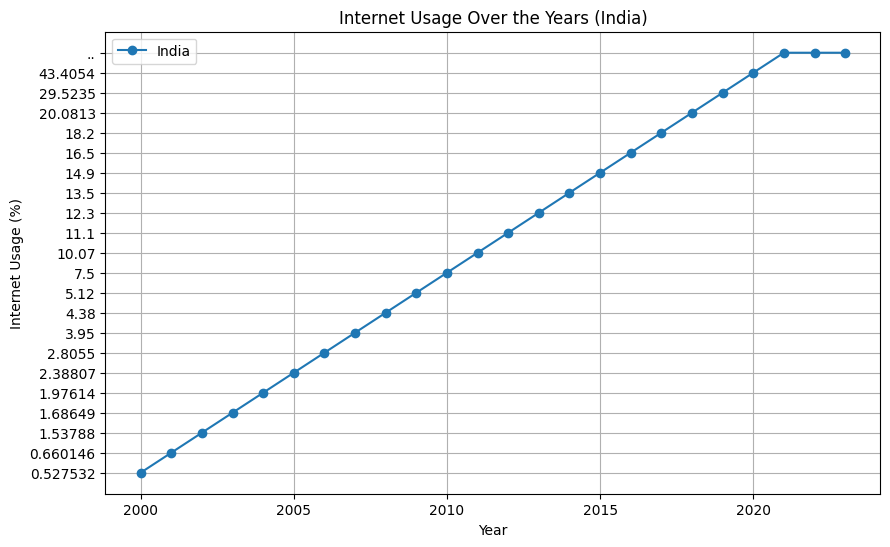

In [7]:
# Line Plot: Internet usage over the years for a specific country
country_data = data[data['Country Name'] == 'India'].iloc[:, 2:].dropna(axis=1)
years = country_data.columns.astype(int)
usage = country_data.values.flatten()

plt.figure(figsize=(10, 6))
plt.plot(years, usage, marker='o', label='India')
plt.title('Internet Usage Over the Years (India)')
plt.xlabel('Year')
plt.ylabel('Internet Usage (%)')
plt.legend()
plt.grid(True)
plt.show()

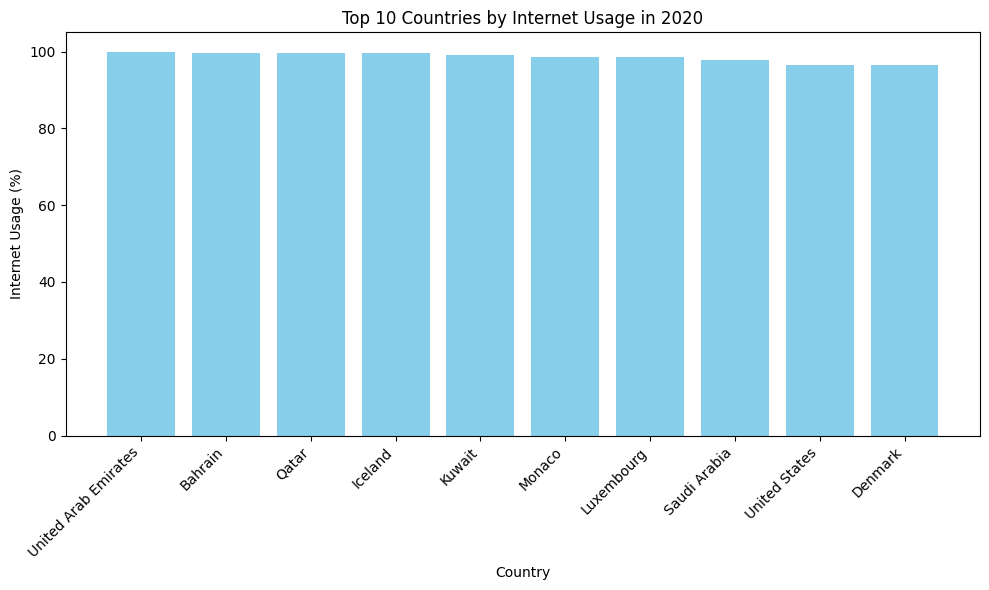

In [9]:
# Bar Plot: Internet usage comparison for a specific year
year = '2020'
data[year] = pd.to_numeric(data[year], errors='coerce')  # Convert to numeric, handling errors
top_countries = data[['Country Name', year]].dropna().nlargest(10, year)

plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country Name'], top_countries[year], color='skyblue')
plt.title(f'Top 10 Countries by Internet Usage in {year}')
plt.xlabel('Country')
plt.ylabel('Internet Usage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()